# Approaching geovisualization and remote sensing with GeoViews


![Basel](./screenshots/basel_districts_and_cafes.png)

09/05/2018 @ GeoPython

Giacomo Debidda

## What is GeoViews?

A Python library that makes it easy to explore and visualize geographical, meteorological, oceanographic datasets.

- GIS extension for Holoviews (high-level visualization library)
- Uses Cartopy for geographic projections
- Uses Shapely for geometries
- Allows to create plots from multidimesional dataset (gridded dataset)
- Makes it easy to overlay layers in a visualization
- Leverages many Python libraries: Pandas, GeoPandas, Xarray, Datashader

## GeoViews objects

GeoViews objects are just like HoloViews objects...


...with an associated geographic projection based on a Coordinate Reference System defined in `cartopy.crs`.


GeoViews provides the `Feature` (`cartopy` features) and `Shape` (`shapely` geometries) types.

## Imports

We need `shapely` for geometries, `cartopy` and `pyproj` for projections, `geopandas` for spatial joins.

In [1]:
import os
import pyproj
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import shapely as shp
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs  # Cartopy coordinate reference system
import cartopy.feature as cf
import matplotlib.pyplot as plt
from bokeh.models import WMTSTileSource
from bokeh.tile_providers import STAMEN_TERRAIN, STAMEN_TONER
# import bokeh.sampledata
# bokeh.sampledata.download()  # this will download to /home/jack/.bokeh/data/
from bokeh.sampledata.airport_routes import airports, routes

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')
print(data_dir)

/home/jack/Repos/geopython-basel/data


## Choose a plotting backend

GeoViews (and HoloViews) can use either a Matplotlib backend or a Bokeh backend.
<br>
<br>
<dl>
  <dt>Matplotlib</dt>
  <dd><b>+</b> supports more projections</dd>
  <dd><b>-</b> less interactivity</dd>
  <dd><b>-</b> at the moment, it seems not possible to use Web Map Tile Services (WMTS)</dd>
  <br>
  <dt>Bokeh</dt>
  <dd><b>+</b> better interactivity</dd>
  <dd><b>+</b> can use Web Map Tile Services</dd>
  <dd><b>-</b> supports only the Mercator projection</dd>
</dl>

Note: visual attributes have (slightly) different names in the plotting backends (e.g. `facecolor` in Matplotlib VS `fill_color` in Bokeh).

See [here](http://geo.holoviews.org/Projections.html) to know the projections supported by GeoViews.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
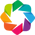

In [3]:
hv.notebook_extension('bokeh', 'matplotlib')
%output backend='matplotlib'

## `opts` (`OptsMagic`)

You can use the `%%opts` cell **magic command** to set some options (e.g. change the geographical projection).

`opts` is not a built-in magic command, it's provided by HoloViews.

See `OptsMagic` class in `holoviews.ipython.magics.py` and `OptsSpec` in `holoviews.util.parser` or call `%%opts?` in a notebook cell.

See [how to customize plots](http://holoviews.org/user_guide/Customizing_Plots.html) in the HoloViews documentation.

:Feature   [Longitude,Latitude]
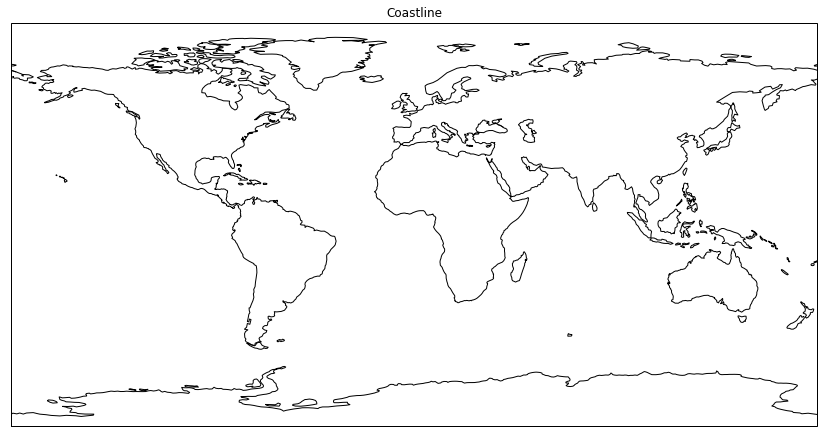

In [4]:
%%output size=400
%%opts Feature [projection=ccrs.PlateCarree()]
gf.coastline

## Combining geographical features

You can create HoloViews layouts by combining and overlaying several GeoViews `Feature` elements.

You can use `hv.Overlay` or the `*` operator to combine several GeoViews features into a single HoloViews layout.

:Layout
   .Overlay.I  :Overlay
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
   .Overlay.II :Overlay
      .Ocean.I  :Feature   [Longitude,Latitude]
      .Rivers.I :Feature   [Longitude,Latitude]
      .Lakes.I  :Feature   [Longitude,Latitude]
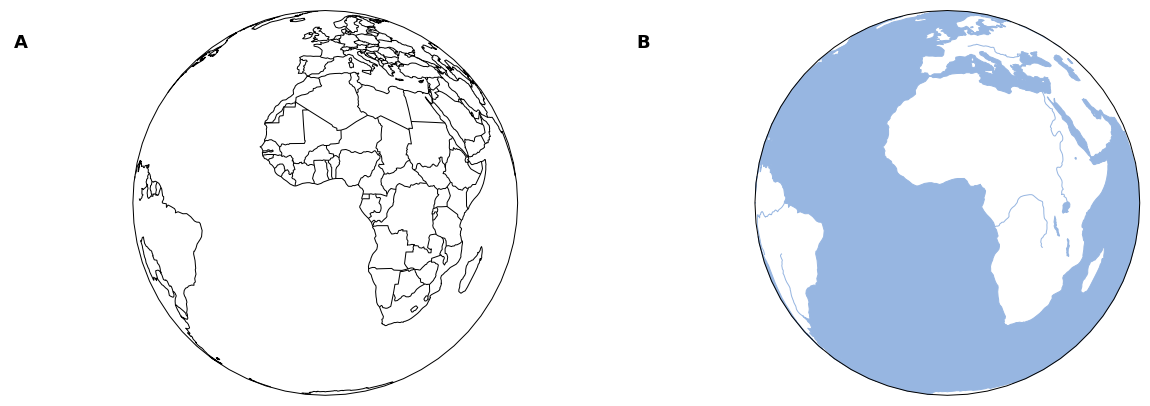

In [5]:
%%output size=200
%%opts Feature [projection=ccrs.Geostationary()]
hv.Overlay([gf.coastline, gf.borders]) + gf.ocean * gf.rivers * gf.lakes

## GeoViews `Feature`

A GeoViews `Feature` is a Cartopy feature with additional properties and methods.

In fact, `gf.ocean` is just a shortcut for `gv.Feature(cf.OCEAN, group='Ocean')`.

See the docs for the [Cartopy Feature interface](http://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html).

Here are the features currently available in `geoviews.feature.py`:

```python
borders   = Feature(cf.BORDERS, group='Borders')
coastline = Feature(cf.COASTLINE, group='Coastline')
land      = Feature(cf.LAND, group='Land')
lakes     = Feature(cf.LAKES, group='Lakes')
ocean     = Feature(cf.OCEAN, group='Ocean')
rivers    = Feature(cf.RIVERS, group='Rivers')
```

## Create a GeoViews feature from Natural Earth

`cartopy` provides an interface to [Natural Earth](http://www.naturalearthdata.com/) shapefiles.

*Natural Earth* $\rightarrow$ *Cartopy* $\rightarrow$ *GeoViews*

Let's create a feature for the [graticules](http://desktop.arcgis.com/en/arcmap/10.3/map/page-layouts/what-are-grids-and-graticules-.htm).

First, create a Cartopy feature.

`scale` is the dataset scale, i.e. one of '10m', '50m', or '110m'.

Corresponding to 1:10,000,000, 1:50,000,000, and 1:110,000,000 respectively.

In [6]:
cartopy_graticules = cf.NaturalEarthFeature(category='physical',
                                            name='graticules_30',
                                            scale='110m')
cartopy_graticules

Then, use the Cartopy feature to create a GeoViews feature.

:Feature   [Longitude,Latitude]
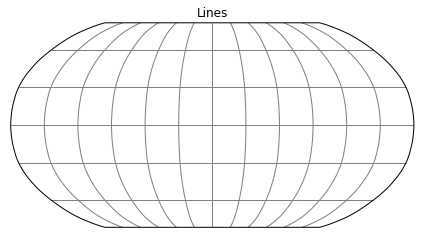

In [7]:
%%output size=200
%%opts Feature.Lines (facecolor='none' edgecolor='gray') [projection=ccrs.Robinson()]
graticules = gv.Feature(cartopy_graticules, group='Lines')
graticules

## Create a GeoViews `Feature` from any shapefile

Cartopy `shapereader` provides an interface for accessing the contents of a shapefile.

*Shapefile* $\rightarrow$ *Cartopy* $\rightarrow$ *GeoViews*

Shapefile: [American Indian/Alaska Native Areas/Hawaiian Home Lands](https://www.census.gov/geo/maps-data/data/cbf/cbf_aiannh.html) from United Stated Census Bureau.

In [8]:
# Note: this file takes ~10s to be processed
shp_filepath = os.path.join(data_dir, 'tl_2017_us_aiannh', 'tl_2017_us_aiannh.shp')
reader = shpreader.Reader(shp_filepath)
# Note: you need to know the cartopy CRS in which the provided geometries are defined.
cartopy_homelands = cf.ShapelyFeature(geometries=reader.geometries(), crs=ccrs.PlateCarree())
cartopy_homelands

:Feature   [Longitude,Latitude]
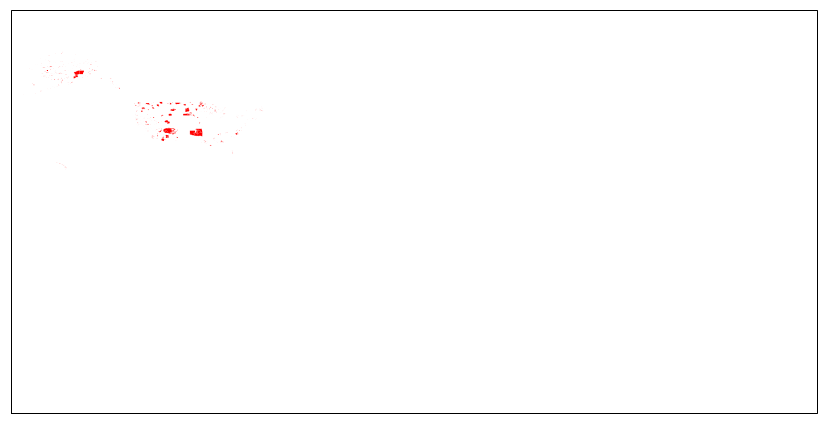

CPU times: user 10.8 s, sys: 12 ms, total: 10.8 s
Wall time: 10.9 s


In [9]:
%%time
%%output size=400
%%opts Feature.Lines (facecolor='none' edgecolor='black') [projection=ccrs.PlateCarree()]
homelands = gv.Feature(cartopy_homelands)
homelands_style = {'facecolor': 'red', 'alpha': 1.0}
homelands.opts(style=homelands_style)

You can also avoid using Cartopy and read a shapefile with GeoPandas, or even directly with `gv.Shape` (a wrapper for Shapely's `Shape`).

*Shapefile* $\rightarrow$ *GeoViews*

Note: thanks to Shapely you don't need a GeoJSON (or TopoJSON) to build a geometry. You are using binary buffers to read the data.

In [10]:
%%time
ndoverlay = gv.Shape.from_shapefile(shp_filepath)

CPU times: user 8.1 s, sys: 20 ms, total: 8.12 s
Wall time: 8.15 s


:NdOverlay   [Index]
   :Shape   [Longitude,Latitude]   (Level)
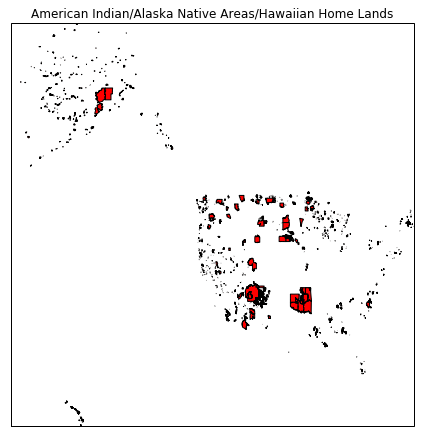

CPU times: user 29.4 s, sys: 100 ms, total: 29.5 s
Wall time: 29.6 s


In [11]:
%%time
%%output size=200
%%opts Shape (facecolor='red' alpha=1.0)
ndoverlay.relabel('American Indian/Alaska Native Areas/Hawaiian Home Lands')

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Lines.I     :Feature   [Longitude,Latitude]
   .Feature.I   :Feature   [Longitude,Latitude]
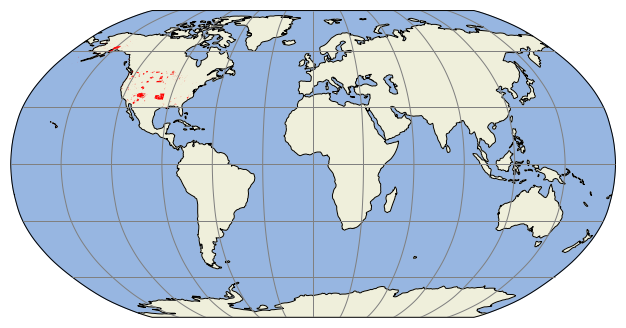

CPU times: user 34.9 s, sys: 20 ms, total: 34.9 s
Wall time: 35 s


In [12]:
%%time
%%output size=300
%%opts Feature [projection=ccrs.Robinson()]
layout = hv.Overlay([gf.ocean, gf.land, gf.coastline, graticules, homelands.opts(style=homelands_style)])
layout

## All flights from Honolulu

Data:

`airports` and `routes` from `bokeh.sampledata.airport_routes`.

Code not showns in slides. See jupyter notebook.

In [13]:
print(f'{len(airports)} total airports in this dataset')
airports.head()

1435 total airports in this dataset


AirportID                        Name           City        Country IATA  \
0       3411  Barter Island LRRS Airport  Barter Island  United States  BTI   
1       3413  Cape Lisburne LRRS Airport  Cape Lisburne  United States  LUR   
2       3414      Point Lay LRRS Airport      Point Lay  United States  PIZ   
3       3415  Hilo International Airport           Hilo  United States  ITO   
4       3416   Orlando Executive Airport        Orlando  United States  ORL   

   ICAO   Latitude   Longitude  Altitude Timezone DST                 TZ  \
0  PABA  70.134003 -143.582001         2       -9   A  America/Anchorage   
1  PALU  68.875099 -166.110001        16       -9   A  America/Anchorage   
2  PPIZ  69.732903 -163.005005        22       -9   A  America/Anchorage   
3  PHTO  19.721399 -155.048004        38      -10   N   Pacific/Honolulu   
4  KORL  28.545500  -81.332901       113       -5   A   America/New_York   

      Type       source  
0  airport  OurAirports  
1  airport  OurAirports  
2  airport  OurAirports  
3  airport  OurAirports  
4  airport  OurAirports

In [14]:
print(f'{len(routes)} total routes in this dataset')
routes.head()

10507 total routes in this dataset


Airline AirlineID Source  SourceID Destination  DestinationID Codeshare  \
0      2O       146    ADQ      3531         KLN           7162       NaN   
1      2O       146    KLN      7162         KYK           7161       NaN   
2      3E     10739    BRL      5726         ORD           3830       NaN   
3      3E     10739    BRL      5726         STL           3678       NaN   
4      3E     10739    DEC      4042         ORD           3830       NaN   

   Stops Equipment  
0      0       BNI  
1      0       BNI  
2      0       CNC  
3      0       CNC  
4      0       CNC

In [15]:
src = airports[airports.City == 'Honolulu'].iloc[0]
src

AirportID                              3728
Name         Honolulu International Airport
City                               Honolulu
Country                       United States
IATA                                    HNL
ICAO                                   PHNL
Latitude                            21.3187
Longitude                          -157.922
Altitude                                 13
Timezone                                -10
DST                                       N
TZ                         Pacific/Honolulu
Type                                airport
source                          OurAirports
Name: 311, dtype: object

In [16]:
def get_great_circle_path(coords_src, coords_dest, samples=50):
    # TODO: write docstring
    sx, sy = coords_src
    ex, ey = coords_dest
    g = pyproj.Geod(ellps='WGS84')
    (az12, az21, dist) = g.inv(sx, sy, ex, ey)
    lonlats = g.npts(sx, sy, ex, ey, samples)
    return np.array([(sx, sy)] + lonlats + [(ex, ey)])

In [17]:
paths = []
routes_from_source = routes[routes.SourceID == src.AirportID]
destinations = airports[airports.AirportID.isin(routes_from_source.DestinationID.values)]

for i, dest in destinations.iterrows():
    # print(f'{src.Name} -> {dest.Name}')
    path = get_great_circle_path((src.Longitude, src.Latitude), (dest.Longitude, dest.Latitude))
    paths.append(path)

In [18]:
dataset = gv.Dataset(airports, kdims=['Name'])

In [19]:
geo_projection = ccrs.Geostationary(central_longitude=src.Longitude)

:Overlay
   .Coastline.I :Feature   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (Name)
   .Path.I      :Path   [Longitude,Latitude]
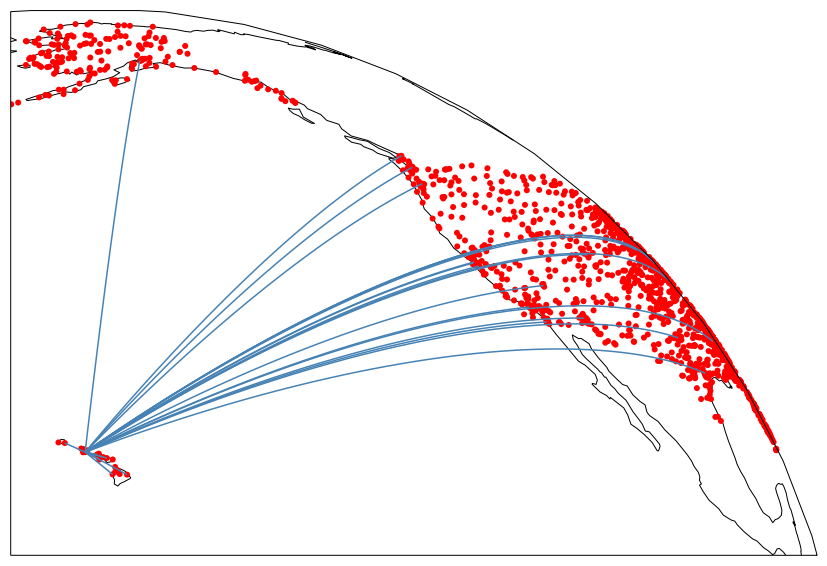

In [20]:
%%output size=400
%%opts Feature [projection=geo_projection]
%%opts Points (color='red' size=3) [projection=geo_projection]
%%opts Path (color='steelblue') [projection=geo_projection]
points = dataset.to(gv.Points, kdims=['Longitude', 'Latitude'], vdims=['Name'])
(gf.coastline * points * gv.Path(paths)).redim.range(
    Longitude=(src.Longitude-5, -50), Latitude=(src.Latitude-5, 80))

## Gridded Datasets

Data:

netCDF file (Air quality) from [NOAA](https://www.esrl.noaa.gov/psd/repository/entry/show?entryid=synth%3Ae570c8f9-ec09-4e89-93b4-babd5651e7a9%3AL25jZXAucmVhbmFseXNpcy5kZXJpdmVkL3N1cmZhY2UvYWlyLm1vbi5tZWFuLm5j).

In [21]:
netcdf_filepath = os.path.join(data_dir, 'air.mon.mean.nc')
ds_air = xr.open_dataset(netcdf_filepath)
ds_air

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 840)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [22]:
dataset = gv.Dataset(ds_air, label=ds_air.attrs['title'])
type(dataset)

geoviews.element.geo.Dataset

In [23]:
img_air = dataset.to(gv.Image, kdims=['lon', 'lat'], dynamic=True)
type(img_air)

holoviews.core.spaces.DynamicMap

In [24]:
%%time
%%opts Image [colorbar=True fig_size=400 xaxis=None yaxis=None] (cmap='viridis')
%%opts Feature [projection=ccrs.Robinson()]
dynamic_map = img_air * gf.borders * gf.coastline
dynamic_map

:DynamicMap   [time]
   :Overlay
      .Image.Monthly_mean_air_full_stop_sig995_from_the_NCEP_Reanalysis :Image   [lon,lat]   (air)
      .Borders.I                                                        :Feature   [Longitude,Latitude]
      .Coastline.I                                                      :Feature   [Longitude,Latitude]

CPU times: user 5.75 s, sys: 36 ms, total: 5.78 s
Wall time: 5.9 s


## Web Map Tile Services (WMTS)

In order to use a map tiles you need to switch to a bokeh plotting backend.

In [25]:
tiles = {
    'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
    'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
    'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
    # 'STAMEN_TONER': STAMEN_TONER,
    'STAMEN_TERRAIN': STAMEN_TERRAIN
}

Note: at the moment, bokeh supports only the web Mercator projection. See [here](http://geo.holoviews.org/user_guide/Working_with_Bokeh.html).

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
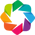

In [26]:
hv.notebook_extension('bokeh')

In [27]:
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]
# click on the "Wheel Zoom" tool and zoom out
hv.NdLayout(
    {name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=ccrs.PlateCarree()) 
     for name, wmts in tiles.items()}, kdims=['Source']
).cols(2)

:NdLayout   [Source]
   :WMTS   [Longitude,Latitude]

## Basel's City Districts, Parks and Cafes

Data:

Basel districts shapefile from [OpenStreetMap](https://wiki.openstreetmap.org/wiki/City_of_Basel_Suburb_Import) (raw data, not the `.osm` file).

Basel parks and cafes shapefile from [BBBike](https://extract.bbbike.org/).

In [28]:
basel_somerc = gpd.read_file(os.path.join(data_dir, 'WE_StatWohneinteilungen', 'Wohnviertel.shp'))
print(basel_somerc.crs)
basel_somerc.head()

INFO:Fiona:Failed to auto identify EPSG: 7


{'proj': 'somerc', 'lat_0': 46.95240555555556, 'lon_0': 7.439583333333333, 'k_0': 1, 'x_0': 2600000, 'y_0': 1200000, 'ellps': 'bessel', 'units': 'm', 'no_defs': True}


OBJID  OBJECTID TXT ZTXT          TYPE  \
0  17136         1   7   07    Bruderholz   
1  17139         2   6   06  Gundeldingen   
2  17142         3   5   05     St. Alban   
3  17145         4   4   04        Breite   
4  17148         5   8   08    Bachletten   

                                            geometry  
0  POLYGON ((2612555.909 1264547.542, 2612560.552...  
1  POLYGON ((2610887.105 1266551.468, 2610896.202...  
2  POLYGON ((2612941.971 1267023.045, 2613000.085...  
3  POLYGON ((2613683.78 1266891.09, 2613686.423 1...  
4  POLYGON ((2610560.968 1266791.31, 2610571.054 ...

## Convert 21781 (CH1903) to 4326 (WGS84)

You can use `pyproj.Proj` and reproject manually...

In [29]:
# https://gis.stackexchange.com/a/277488/119309
input_projection = pyproj.Proj(init='EPSG:21781')
output_projection = pyproj.Proj(init='EPSG:4326')
pyproj.transform(input_projection, output_projection, x=basel_somerc.crs['x_0'], y=basel_somerc.crs['y_0'])

(37.37899200094729, 52.46327489367161)

In [30]:
polygons_somerc = [basel_somerc.loc[i, 'geometry'] 
                   for i in range(basel_somerc.shape[0])]

In [31]:
polygons_wgs84 = []
for poly in polygons_somerc:
    x, y = poly.exterior.coords.xy
    x_new, y_new = pyproj.transform(input_projection, output_projection, x, y)
    poly_new = shp.geometry.Polygon(list(zip(x_new, y_new)))
    polygons_wgs84.append(poly_new)

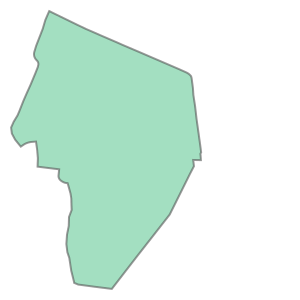

In [32]:
polygons_somerc[0]

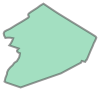

In [33]:
polygons_wgs84[0]

...or use GeoPandas and its `to_crs` method.

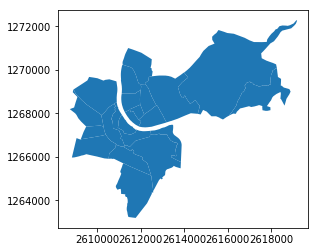

In [34]:
basel_somerc.plot()

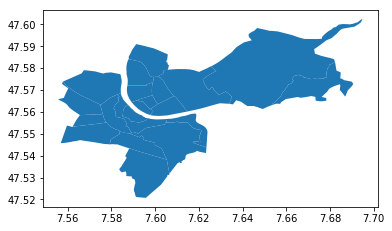

In [35]:
basel_wgs84 = basel_somerc.to_crs(epsg=4326)
basel_wgs84.plot()

## Add a centroid for each district

In [36]:
basel_wgs84['CentroidLongitude'] = basel_wgs84['geometry'].apply(lambda poly: poly.centroid.bounds[0])
basel_wgs84['CentroidLatitude'] = basel_wgs84['geometry'].apply(lambda poly: poly.centroid.bounds[1])
basel_wgs84.head()

OBJID  OBJECTID TXT ZTXT          TYPE  \
0  17136         1   7   07    Bruderholz   
1  17139         2   6   06  Gundeldingen   
2  17142         3   5   05     St. Alban   
3  17145         4   4   04        Breite   
4  17148         5   8   08    Bachletten   

                                            geometry  CentroidLongitude  \
0  POLYGON ((7.606348201652279 47.53293165390978,...           7.595473   
1  POLYGON ((7.584232669336745 47.55098643373825,...           7.592170   
2  POLYGON ((7.611547896278745 47.55519084800139,...           7.608627   
3  POLYGON ((7.621400475031203 47.55398888665725,...           7.617374   
4  POLYGON ((7.57990522852878 47.55314909549825, ...           7.570503   

   CentroidLatitude  
0         47.532624  
1         47.545054  
2         47.546740  
3         47.553016  
4         47.550043

## Basel's parks

Apparently there are some issues with the shapefile I extracted from [BBBike](https://extract.bbbike.org/). Many shapely records are invalid.

Because of these invalid records, `gv.Shape.from_shapefile` does not work.

Luckily enough, you can use `cartopy.shapereader.Reader` and filter out these records with a simple condition.

In [37]:
shp_filepath = os.path.join(data_dir, 'basel_shapefiles', 'natural.shp')
reader = shpreader.Reader(shp_filepath)

In [38]:
parks_generator = (r for r in reader.records() if r.attributes['type'] == 'park')
parks = [p for p in parks_generator if p.geometry.area > 0]

{'osm_id': 12362783, 'name': 'Kannenfeldpark', 'type': 'park'}


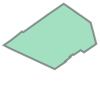

In [39]:
park_geometries = [p.geometry for p in parks]
print(parks[0].attributes)
park_geometries[0]

In [40]:
# some parks have no name. Maybe they are just small (private?) green areas...
', '.join([p.attributes['name'] for p in parks])

'Kannenfeldpark, , Buremichelskopfanlage, Schützenmattpark, Helvetiaplatz, Benkenpark, Theodorsgraben-Anlage, Rosenfeldpark, Christoph Merian-Park, Dreirosenanlage, Elisabethenanlage, Oekolampadpark, Verkehrspark, , , St.Johanns-Platz, St.Johanns-Platz, St.Johanns-Platz, Totentanz, Petersplatz, Tierpark Lange Erlen, Wegmatten, Brüglingen, Raemelmatte, Park Im Grünen (Grün 80), , Dürrenmatten, , St Alban-Tor Park, Rosentalanlage, , Luftmatt, , , , St.Johanns-Park, , , Pruntrutermatte, , , , , , Forum, , , , , , , , , , , , , Gundeli Park, , , Spielplatz Rehhagstrasse, Holderstüdelipark'

In [41]:
%%opts Shape (fill_color='green')
gv.Shape(park_geometries[0]) * gv.Text(7.5704, 47.5653, parks[0].attributes['name'])

:Overlay
   .Shape.I :Shape   [Longitude,Latitude]   (Level)
   .Text.I  :Text   [x,y]

## Basel's Cafes

In [42]:
shp_filepath = os.path.join(data_dir, 'basel_shapefiles', 'points.shp')
reader = shpreader.Reader(shp_filepath)

In [43]:
point_of_interest_types = set([r.attributes['type'] for r in reader.records()])
f'{len(point_of_interest_types)} types of points of interests: {point_of_interest_types}'

"125 types of points of interests: {'fair', 'nightclub', 'turning_circle', 'meetingpoint', 'archaeological_s', 'ferry_terminal', 'traffic_signals;', 'university', 'school', 'station', 'turning_loop', 'construction', 'signal', 'surveillance', 'restaurant', 'level_crossing', 'motorway_junctio', 'mini_roundabout', 'picnic_site', 'dentist', 'clinic', 'bicycle_parking', 'gallery', 'charging_station', 'place_of_worship', 'recycling', 'clock', 'elevator', 'police', 'car_sharing', 'congress_center', 'swimming_pool', 'post_office', 'kindergarten', 'tower', 'library', 'embassy', 'townhall', 'taxi', 'halt', 'waste_basket', 'doctors', 'hospital', 'railway_crossing', 'boundary_stone', 'marketplace', 'courthouse', 'give_way', 'telephone', 'post_box', 'grit_bin', 'car_rental', 'casino', 'monitoring_stati', 'bus_station', 'brothel', 'theme_park', 'cafe', 'fuel', 'parking', 'crossing', 'car_wash', 'attraction', 'motorcycle_parki', 'yard', 'guest_house', 'wayside_cross', 'viewpoint', 'vending_machine', 

In [44]:
cafes = [r for r in reader.records() if r.attributes['type'] == 'cafe']
f'There are {len(cafes)} cafes in Basel'

'There are 74 cafes in Basel'

In [45]:
cafes[0].geometry.bounds

(7.5938822, 47.5692456, 7.5938822, 47.5692456)

In [46]:
cafes_data = list(map(lambda x: (x.geometry.bounds[0], x.geometry.bounds[1], x.attributes['name']), cafes))

In [47]:
cafes_df = pd.DataFrame(cafes_data, columns=['Longitude', 'Latitude', 'Name'])
cafes_df.head()

Longitude   Latitude          Name
0   7.593882  47.569246  Senat Maki's
1   7.588602  47.567340     Per Tutti
2   7.590183  47.567713        Ticino
3   7.588983  47.575878              
4   7.592869  47.566456  Da Graziella

In [48]:
cafes_dataset = gv.Dataset(cafes_df, kdims=['Name'])

In [49]:
%%opts WMTS [width=800 height=600]
%%opts Shape (fill_color='green' fill_alpha=0.5)
%%opts Points (color='orange' line_color='black' size=7) [tools=['hover']]
hv.Overlay([
    gv.WMTS(tiles['ESRI'], crs=ccrs.PlateCarree()), 
    hv.NdOverlay({i: gv.Shape(pg, crs=ccrs.PlateCarree()) for i, pg in enumerate(park_geometries)}),
    cafes_dataset.to(gv.Points, kdims=['Longitude', 'Latitude'], vdims=['Name'], crs=ccrs.PlateCarree()),
])

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .NdOverlay.I :NdOverlay   [Element]
      :Shape   [Longitude,Latitude]   (Level)
   .Points.I    :Points   [Longitude,Latitude]   (Name)

In [50]:
# we need to use a matplotlib backend for the next maps
hv.notebook_extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [51]:
def shape_district(poly):
    style = {'facecolor': 'gray', 'alpha': 0.3}
    return gv.Shape(poly, crs=ccrs.PlateCarree()).opts(style=style)

def shape_park(poly):
    style = {'facecolor': 'green', 'alpha': 0.8}
    return gv.Shape(poly, crs=ccrs.PlateCarree()).opts(style=style)

def text_centroid(lon, lat, name):
    style = {'alpha': 1}
    return gv.Text(x=lon, y=lat, text=name, fontsize=12).opts(style=style)

In [52]:
centroid_dataset = gv.Dataset(basel_wgs84, kdims=['CentroidLongitude', 'CentroidLatitude'], vdims=['TYPE'])
centroids = centroid_dataset.to(gv.Points, kdims=['CentroidLongitude', 'CentroidLatitude'], vdims=['TYPE'], crs=ccrs.PlateCarree())
centroids.opts(style={'color': 'red', 'edgecolor': 'black', 's': 5})

cafe_points = cafes_dataset.to(gv.Points, kdims=['Longitude', 'Latitude'], vdims=['Name'], crs=ccrs.PlateCarree())
cafe_points.opts(style={'color': 'orange', 'edgecolor': 'black', 's': 5});

list_centroid = list(zip(basel_wgs84.CentroidLongitude, basel_wgs84.CentroidLatitude, basel_wgs84.TYPE))

:Overlay
   .NdOverlay.I   :NdOverlay   [Element]
      :Shape   [Longitude,Latitude]   (Level)
   .NdOverlay.II  :NdOverlay   [Element]
      :Shape   [Longitude,Latitude]   (Level)
   .NdOverlay.III :NdOverlay   [Element]
      :Text   [x,y]
   .Points.I      :Points   [Longitude,Latitude]   (Name)
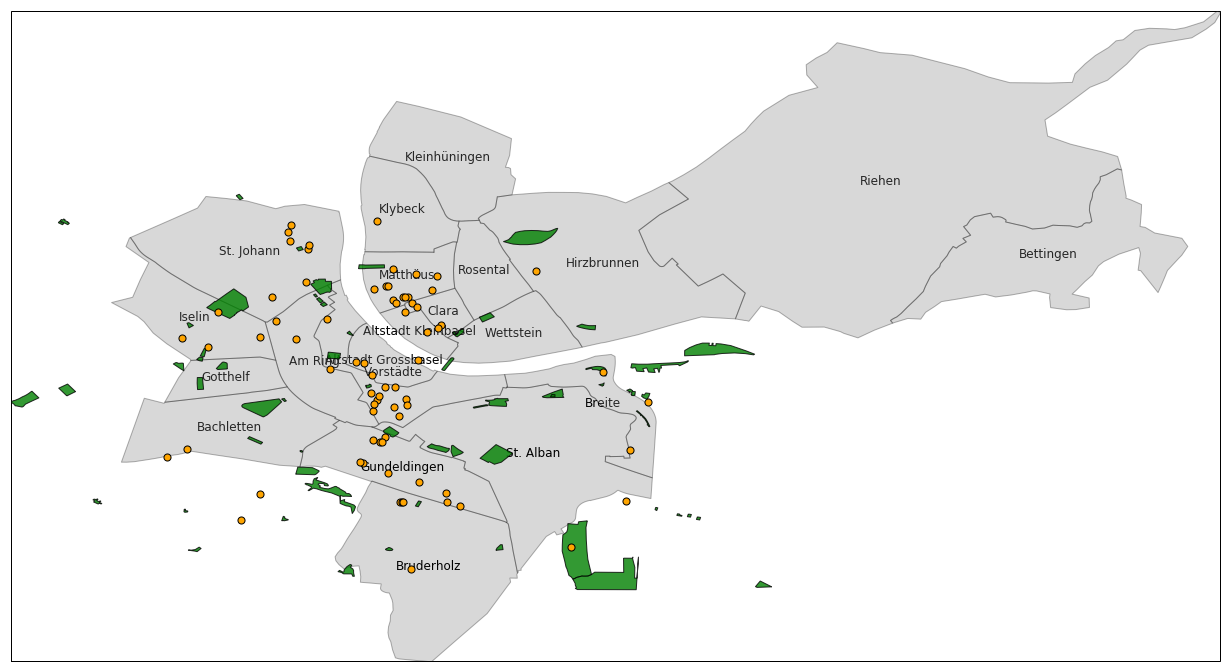

In [53]:
%%output size=600
hv.Overlay([
    hv.NdOverlay({i: shape_district(poly) for i, poly in enumerate(basel_wgs84.geometry)}),
    hv.NdOverlay({i: shape_park(poly) for i, poly in enumerate(park_geometries)}),
    hv.NdOverlay({i: text_centroid(lon, lat, name) for i, (lon, lat, name) in enumerate(list_centroid)}),
    cafe_points.opts(style={'color': 'orange', 'edgecolor': 'black', 's': 50}),
])

## Districts with the highest number of Cafes?

In [54]:
names = []
points = []
for i, cafe in cafes_df.iterrows():
    names.append(cafe.Name)
    points.append(shp.geometry.Point((cafe.Longitude, cafe.Latitude)))
    
cafes_gdf = gpd.GeoDataFrame({'Cafe': names, 'geometry': points}, crs={'init': 'epsg:4326', 'no_defs': True})
cafes_gdf.head()

Cafe                      geometry
0  Senat Maki's  POINT (7.5938822 47.5692456)
1     Per Tutti  POINT (7.5886017 47.5673398)
2        Ticino   POINT (7.5901833 47.567713)
3                POINT (7.5889833 47.5758776)
4  Da Graziella  POINT (7.5928691 47.5664559)

In [55]:
districts_and_cafes = gpd.sjoin(basel_wgs84[['TYPE', 'geometry']], cafes_gdf, how="left", op='contains')
# districts_and_cafes.head()

In [56]:
cafes_count = districts_and_cafes.groupby('TYPE')[['Cafe']].count().rename(columns={'Cafe': 'CafeCount'})
cafes_in_basel = cafes_count.sort_values(by='CafeCount', ascending=False).reset_index()
# cafes_in_basel.head()

In [61]:
gdf = pd.merge(basel_wgs84[['TYPE', 'geometry']], cafes_in_basel)
gdf.sort_values(by='CafeCount', ascending=False).head()

TYPE                                           geometry  CafeCount
18      Matthäus  POLYGON ((7.598904359545449 47.57318222535969,...         12
5      Vorstädte  POLYGON ((7.58481814196309 47.56691635597112, ...         12
1   Gundeldingen  POLYGON ((7.584232669336745 47.55098643373825,...         11
10    St. Johann  POLYGON ((7.572597585628209 47.57850891520469,...          7
9         Iselin  POLYGON ((7.575575941753982 47.56093059715941,...          4

:Polygons   [Longitude,Latitude]   (TYPE,CafeCount)
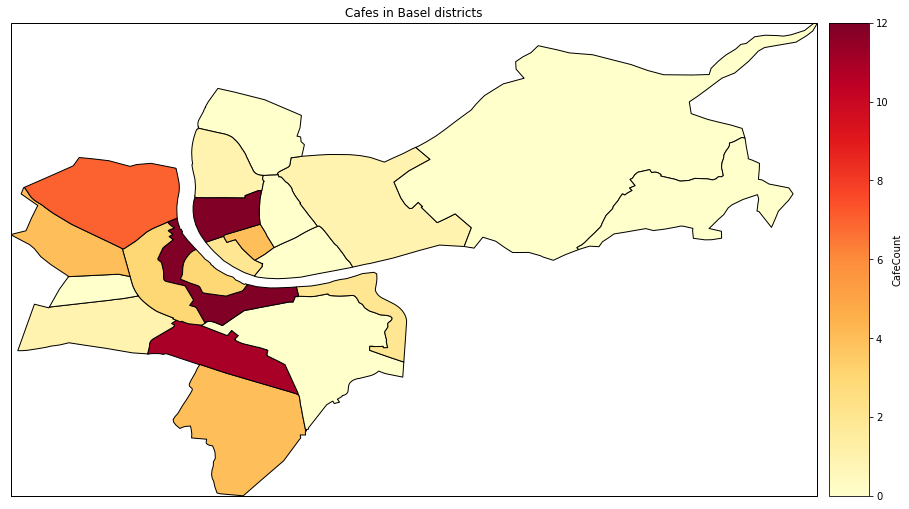

In [62]:
%%output size=400
%%opts Polygons (cmap='YlOrRd') [color_index='CafeCount' colorbar=True]
gv.Polygons(gdf, vdims=['TYPE', 'CafeCount'], label='Cafes in Basel districts')

## Thank You!

You can find the code for this presentation on [GitHub](https://github.com/jackdbd/geoviews-geopython-2018).